<a href="https://colab.research.google.com/github/Iztund/portfolio/blob/data-analysis/Northwind_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries to use for the analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, linregress
import scipy


In [ ]:
#importing the product_sales and sales_trends_with_products for analysis

product_sales = pd.read_csv("/content/northwind_products_sales.csv")
sales_trends = pd.read_csv("/content/northwind_sales_trends_product.csv")

Text(0, 0.5, 'ProductName')

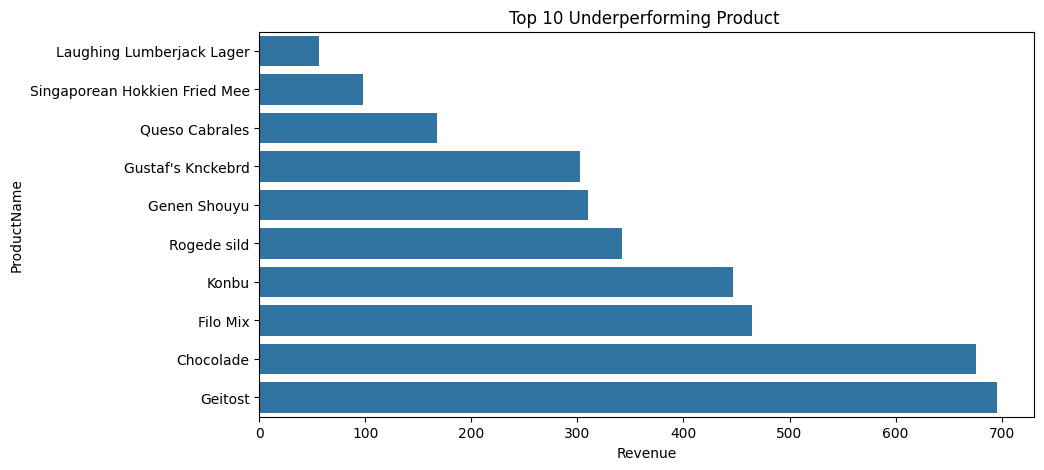

In [ ]:
#visualizing the product_sales data to identify top 10 underperforming products

product_sales.sort_values('Revenue', inplace = True)
plt.figure(figsize=(10,5))
sns.barplot(x='Revenue', y='ProductName', data=product_sales.head(10))
plt.title('Top 10 Underperforming Product ')
plt.xlabel('Revenue')
plt.ylabel('ProductName')

In [ ]:
#Aggregating the sum of revenue of products occuring more than once
sales_trends['orders_date'] = pd.to_datetime(sales_trends['orders_date'],format='%m/%Y')
sales_trends = sales_trends.sort_values('orders_date')
# sales_trends = sales_trends.groupby('orders_date')['Revenue'].sum().reset_index()
sales_trends.head()


,ProductName,orders_date,Revenue
0,Alice Mutton,1996-07-01,936.0
99,Chang,1996-07-01,1596.0
1005,Tofu,1996-07-01,167.4
835,Schoggi Schokolade,1996-07-01,877.5
28,Boston Crab Meat,1996-07-01,735.0


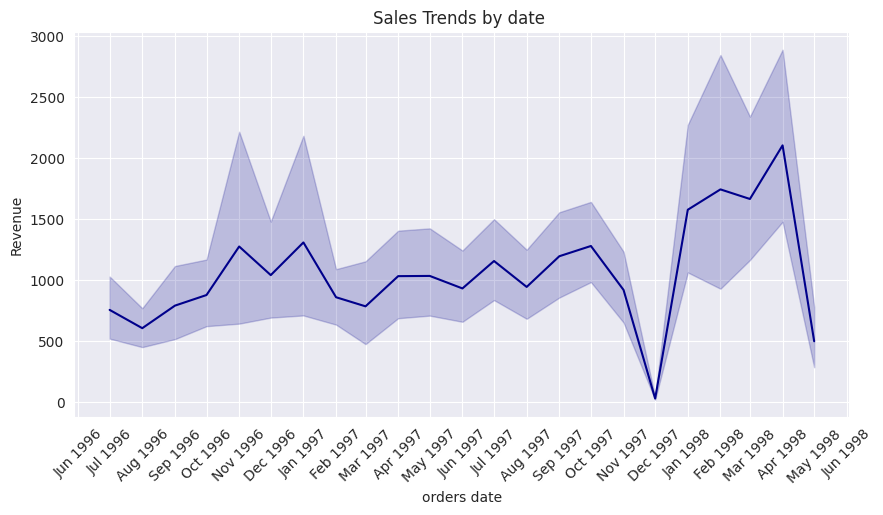

In [ ]:
# visualizing the sales_trend data using the products
import matplotlib.dates as mdates
plt.figure(figsize=(10,5))
sns.lineplot(x='orders_date', y='Revenue', data=sales_trends, markers='o',color='darkblue')
sns.set_style('darkgrid')
sns.set_palette('muted')

#setting x-axis ticks to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Sales Trends by date ')
plt.xlabel('orders date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)

In [ ]:
#importing the customers and inactive customers datas
customer_value_revenue = pd.read_csv('/content/northwind_customer_value_revenue.csv')
inactive_customers_data = pd.read_csv('/content/northwind_inactive_customer.csv')

In [ ]:
#getting the top 20% of customers driving the most revenue using the pareto principle
customer_value_revenue.sort_values('TotalRevenue', inplace = True)
customer_value_revenue['CumulativeRevenue'] = customer_value_revenue['TotalRevenue'].cumsum()
customer_value_revenue['TotalRevenueSum'] = customer_value_revenue['TotalRevenue'].sum()
customer_value_revenue['Percentage'] = customer_value_revenue['CumulativeRevenue'] / customer_value_revenue['TotalRevenueSum'] * 100
top_20_percent_customers = customer_value_revenue[customer_value_revenue['Percentage'] <= 20]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [Text(0, 0, 'CENTC'),
  Text(1, 0, 'LAZYK'),
  Text(2, 0, 'LAUGB'),
  Text(3, 0, 'NORTS'),
  Text(4, 0, 'GALED'),
  Text(5, 0, 'ANATR'),
  Text(6, 0, 'ROMEY'),
  Text(7, 0, 'VINET'),
  Text(8, 0, 'GROSR'),
  Text(9, 0, 'FRANS'),
  Text(10, 0, 'TRAIH'),
  Text(11, 0, 'DUMON'),
  Text(12, 0, 'CONSH'),
  Text(13, 0, 'CACTU'),
  Text(14, 0, 'THECR'),
  Text(15, 0, 'LACOR'),
  Text(16, 0, 'SPECD'),
  Text(17, 0, 'RANCH'),
  Text(18, 0, 'HUNGC'),
  Text(19, 0, 'WILMK'),
  Text(20, 0, 'FRANR'),
  Text(21, 0, 'BLAUS'),
  Text(22, 0, 'THEBI'),
  Text(23, 0, 'OCEAN'),
  Text(24, 0, 'LETSS'),
  Text(25, 0, 'WOLZA'),
  Text(26, 0, 'DRACD'),
  Text(27, 0, 'COMMI'),
  Text(28, 0, 'PE

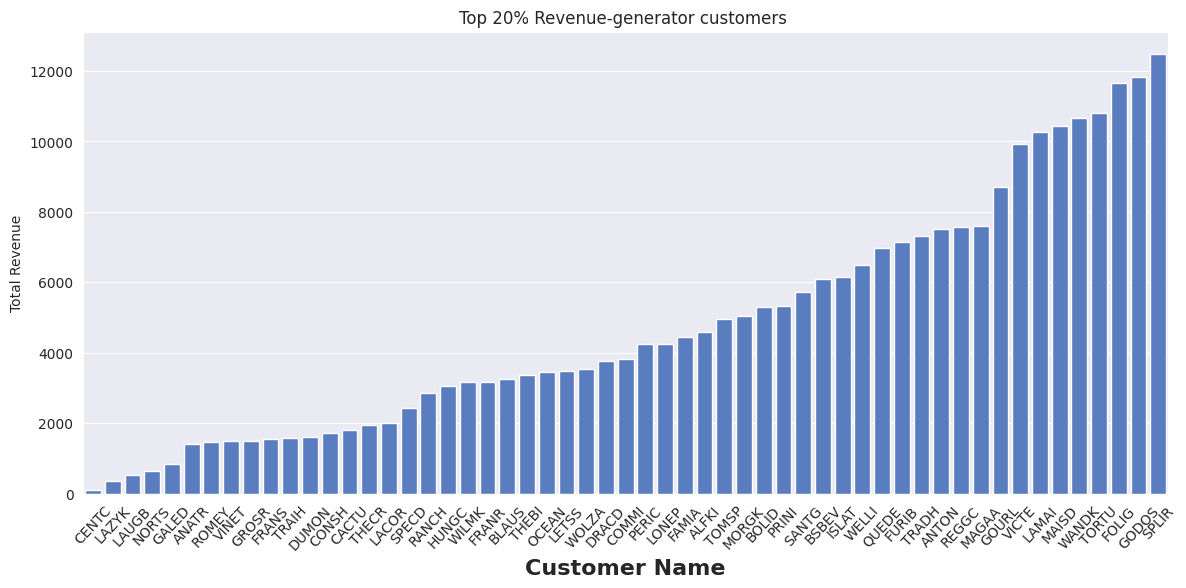

In [ ]:
#visualizing the top 20% customers
plt.figure(figsize=(14,6))
sns.barplot(x='CustomerID', y='TotalRevenue', data=top_20_percent_customers)
plt.title('Top 20% Revenue-generator customers ')
plt.xlabel('Customer Name',fontsize=16, fontweight='bold')
plt.ylabel('Total Revenue')
plt.xticks(rotation=47)

In [ ]:
#printing all the inactive customers
print(inactive_customers_data)

   CustomerID                         CompanyName
0       ALFKI                 Alfreds Futterkiste
1       ANATR  Ana Trujillo Emparedados y helados
2       ANTON              Antonio Moreno Taquera
3       AROUT                     Around the Horn
4       BSBEV                       B's Beverages
..        ...                                 ...
88      WARTH                      Wartian Herkku
89      WELLI              Wellington Importadora
90      WHITC                White Clover Markets
91      WILMK                         Wilman Kala
92      WOLZA                      Wolski  Zajazd

[93 rows x 2 columns]


In [ ]:
#loading the regional datas
regional_data = pd.read_csv("/content/northwind_country_revenue.csv")
declining_growth = pd.read_csv("/content/northwind_regions_with_declining_growth.csv")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Austria'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Venezuela'),
  Text(6, 0, 'UK'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'Ireland'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'Denmark'),
  Text(12, 0, 'Switzerland'),
  Text(13, 0, 'Mexico'),
  Text(14, 0, 'Finland'),
  Text(15, 0, 'Spain'),
  Text(16, 0, 'Italy'),
  Text(17, 0, 'Portugal'),
  Text(18, 0, 'Argentina'),
  Text(19, 0, 'Norway'),
  Text(20, 0, 'Poland')])

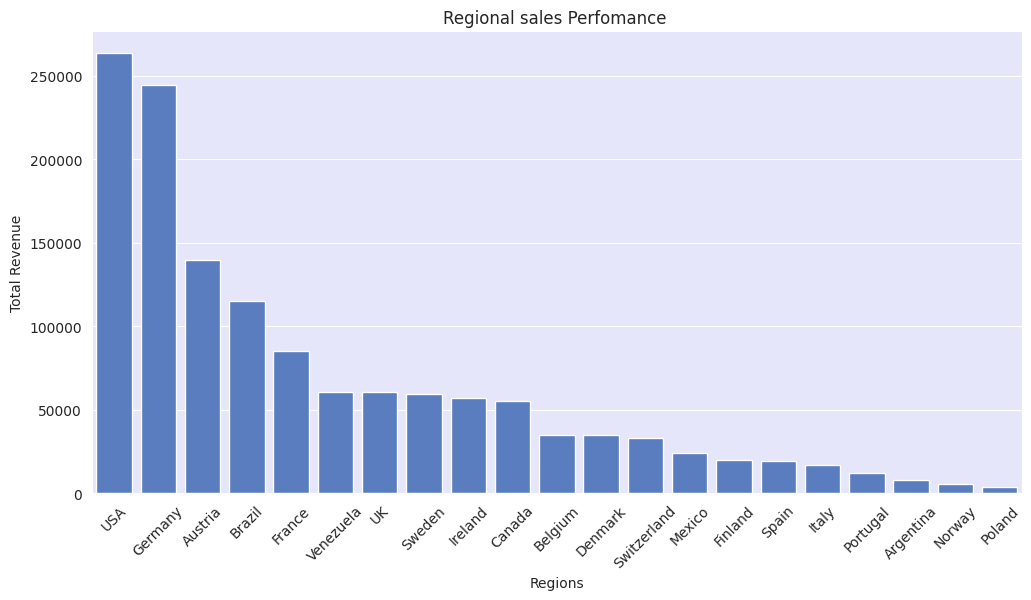

In [ ]:
#visualizing the regional data
fig, ax = plt.subplots(figsize=(12,6))
ax.set_facecolor('lavender')
sns.barplot(x='ShipCountry', y='Tot_Rev_per_region', data=regional_data)
plt.title('Regional sales Perfomance ')
plt.xlabel('Regions')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)


In [ ]:
#describing the countries with declining revenue generation
decline_summary = declining_growth.groupby(['Country'],).agg({
      'Revenue': 'sum',
      'PrevRevenue':'sum'
}).reset_index()
decline_summary.head(10)

,Country,Revenue,PrevRevenue
0,Austria,3246.0,11288.70
1,Belgium,751.0,1754.50
2,Brazil,3411.0,6594.05
3,Canada,582.5,2569.50
4,France,1290.4,2771.95
5,Germany,4730.0,21102.65
6,Italy,560.0,750.00
7,Mexico,300.0,360.00
8,Spain,671.0,2868.80
9,Sweden,484.9,3264.70


In [ ]:
#loading the delivery data
delivery_data = pd.read_csv('/content/northwind_delivery_time.csv')

In [ ]:
#describing the delivery data
delivery_data.describe()

,TotalOrders,DeliveryTime
count,809.000000,809.000000
mean,2.573548,8.491965
std,1.079669,6.838682
min,1.000000,1.000000
25%,2.000000,4.000000
50%,2.000000,7.000000
75%,3.000000,9.000000
max,6.000000,37.000000


In [ ]:
#printing the regions with longest delivery
regions_with_longest_delivery = delivery_data.groupby('ShipCountry')['DeliveryTime'].mean().sort_values(ascending=False)
print('regions with longest delivery time: ',regions_with_longest_delivery )

regions with longest delivery time:  ShipCountry
Ireland        11.000000
Sweden         10.216216
Switzerland     9.941176
USA             9.554622
Argentina       9.285714
Spain           9.217391
Belgium         9.157895
Portugal        8.692308
Austria         8.657895
Venezuela       8.465116
France          8.440000
UK              8.196429
Brazil          8.135802
Germany         8.008333
Poland          8.000000
Italy           7.888889
Mexico          7.814815
Denmark         7.411765
Norway          7.000000
Canada          5.931034
Finland         5.590909
Name: DeliveryTime, dtype: float64


Text(0, 0.5, 'Frequency')

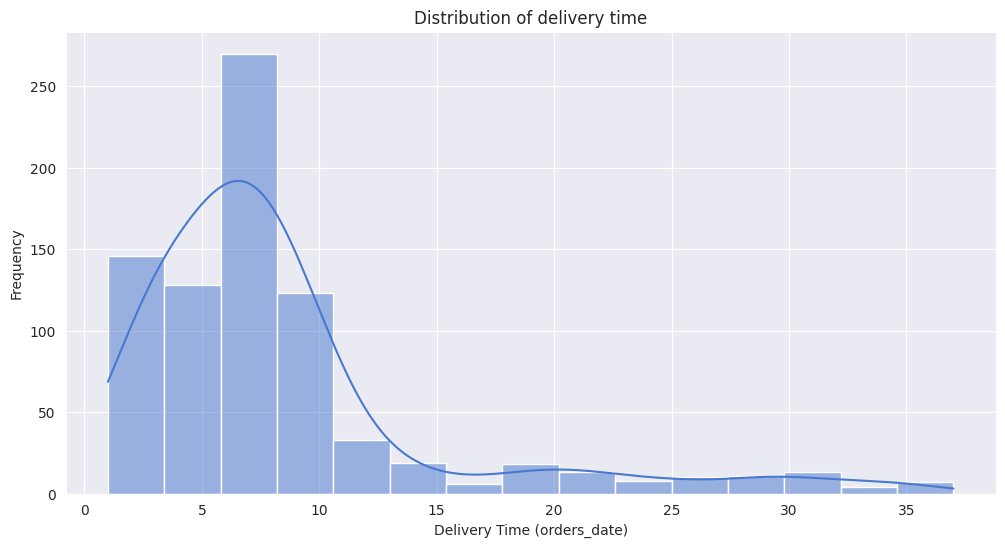

In [ ]:
# #delivery time frequnecy
plt.figure(figsize=(12,6))
sns.histplot(delivery_data['DeliveryTime'], kde=True, bins=15)
plt.title('Distribution of delivery time')
plt.xlabel('Delivery Time (orders_date)')
plt.ylabel('Frequency')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Ireland'),
  Text(3, 0, 'Austria'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Venezuela'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'UK'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Belgium'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Argentina'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Finland'),
  Text(17, 0, 'Poland'),
  Text(18, 0, 'Denmark'),
  Text(19, 0, 'Canada'),
  Text(20, 0, 'Norway')])

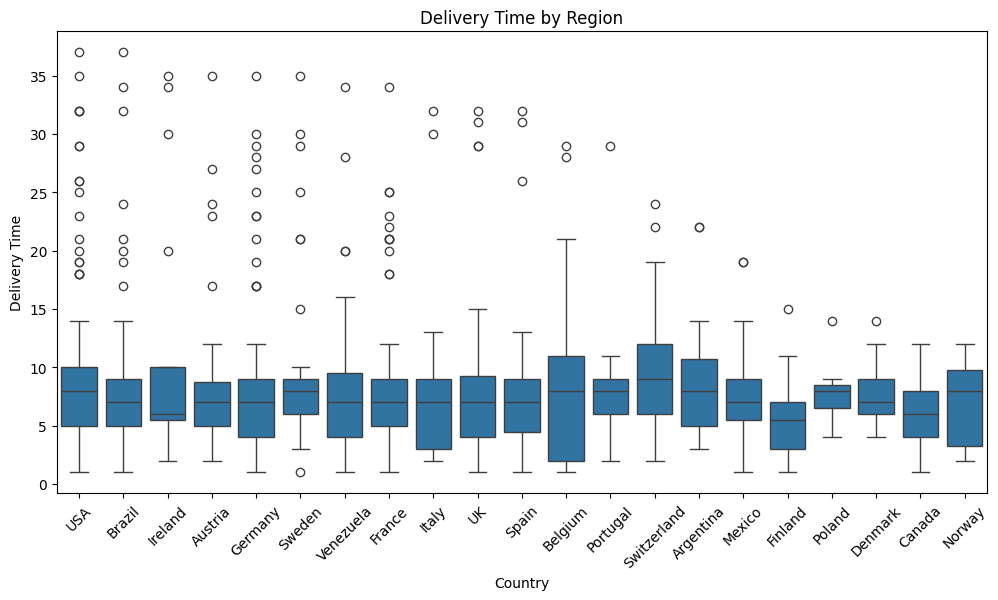

In [ ]:
#plotting the delivery time with the country
plt.figure(figsize=(12,6))
delivery_data = delivery_data.sort_values(by='DeliveryTime', ascending=False)
sns.boxplot(x='ShipCountry', y='DeliveryTime', data=delivery_data)
plt.title('Delivery Time by Region')
plt.xlabel('Country')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)

In [ ]:
#loading the freight data
freight_data = pd.read_csv('/content/northwind_freight_score_and_revenue.csv')


Text(0, 0.5, 'Total Revenue')

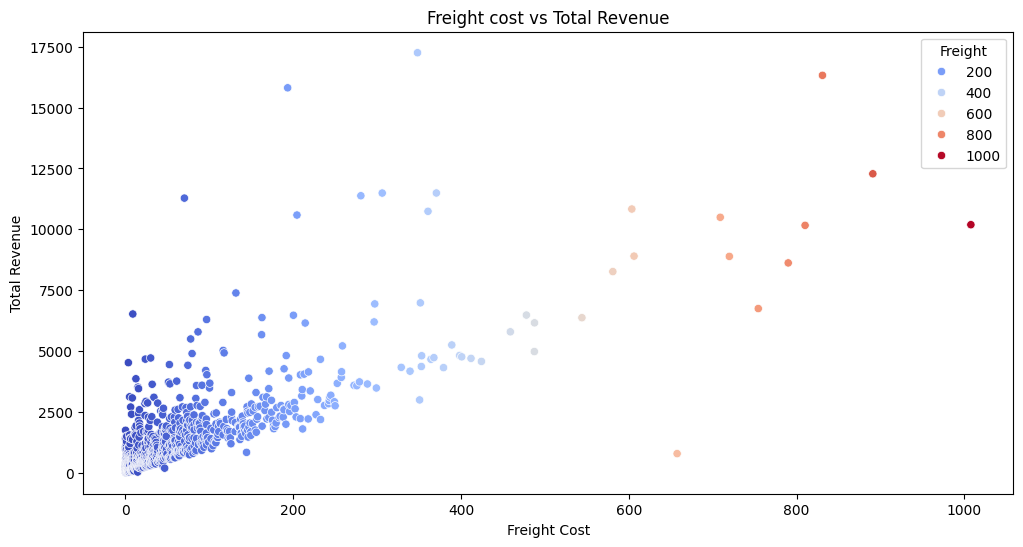

In [ ]:
#plotting the freight cost against the revenue using scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(x='Freight', y='TotalRevenue', data=freight_data, hue='Freight', palette='coolwarm')
plt.title('Freight cost vs Total Revenue')
plt.xlabel('Freight Cost')
plt.ylabel('Total Revenue')


In [ ]:
# getting the impact of freight on total revenue using correlation
correlation, p_value = pearsonr(freight_data['Freight'], freight_data['TotalRevenue'])
if p_value < 0.05:
  print("There is a statistically significant relationship between freight cost and revenue generated")
else:
  print("No statistically significant relationship between freight cost and revenue generated")



There is a statistically significant relationship between freight cost and revenue generated


Text(0, 0.5, 'Profit')

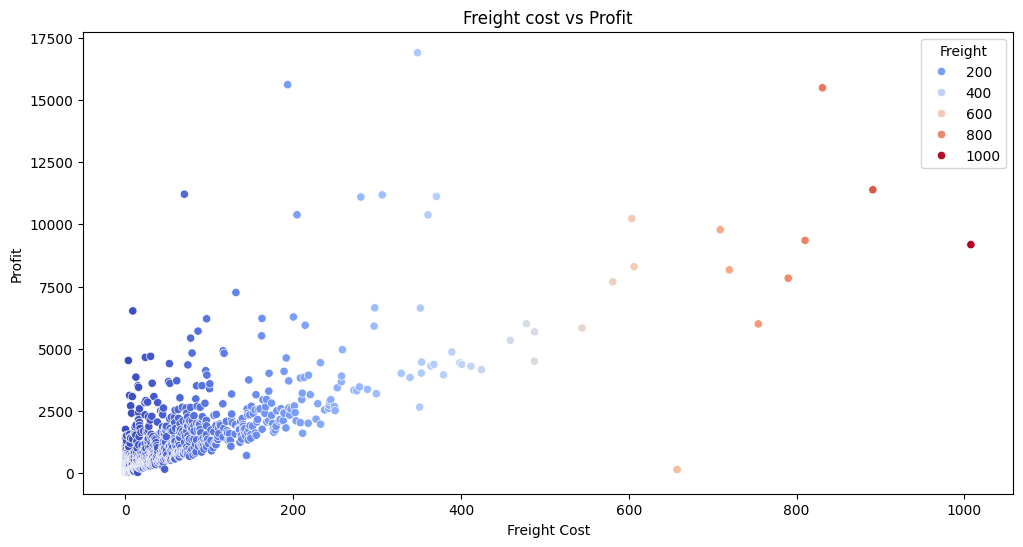

In [ ]:
#plotting the freight against profit
plt.figure(figsize=(12,6))
sns.scatterplot(x='Freight', y='Profit', data=freight_data, hue='Freight', palette='coolwarm')
plt.title('Freight cost vs Profit')
plt.xlabel('Freight Cost')
plt.ylabel('Profit')

In [ ]:
correlation, p_value = pearsonr(freight_data['Freight'], freight_data['Profit'])
if p_value < 0.05:
  print("There is a statistically significant relationship between freight cost and profit generated")
else:
  print("No statistically significant relationship between freight cost and profit generated")

There is a statistically significant relationship between freight cost and profit generated
